## 导入数据集
此处输入 **建模数据和陪跑数据(如果没有陪跑则无需导入)**  
1. **建模数据格式：**（需有TARGET(目前脚本只支持二分类模型,目标值为1,非目标值为0)、(DATE(格式为yyyy-mm-dd或yyyy-mm))以及变量X1、...、Xn） 

| TARGET | (DATE) | X1 | ... | Xn |
|----|----|----|----|----|
|1|2018-12(-10)|x11|...|x1n|
|0|2018-12(-11)|x12|...|x2n|

2. **陪跑数据格式：**（需有DATE(格式为yyyy-mm-dd或yyyy-mm)以及变量X1、...、Xn） 

| DATE | X1 | ... | Xn |
|----|----|----|----|
|2018-12(-10)|x11|...|x1n|
|2018-12(-11)|x12|...|x2n|


In [6]:
import pandas as pd
import numpy as np

In [7]:
with open(r'./usage/data/application_train.csv') as data:
    data = pd.read_csv(data, low_memory=False)
data.columns = [x.upper() for x in data.columns]

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DATE
0,145457,0,Cash loans,M,Y,N,0,288000.0,242595.0,10813.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,2018-05
1,128979,0,Cash loans,F,N,N,0,94500.0,646920.0,20866.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2018-05
2,145448,0,Cash loans,M,Y,Y,1,225000.0,183294.0,14823.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,2018-03
3,294475,0,Cash loans,M,Y,N,0,180000.0,260640.0,20169.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,2018-04
4,216609,0,Revolving loans,M,Y,Y,1,112500.0,180000.0,9000.0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,2018-03


In [8]:
with open(r'./usage/data/application_pp.csv') as pp_data:
    pp_data = pd.read_csv(pp_data, low_memory=False)
pp_data.columns = [x.upper() for x in pp_data.columns]

pp_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DATE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2018-06
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2018-11
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,2018-09
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2018-06
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08


## auto_modeling: 自动化建模脚本

输入规定格式数据集,可全自动化或半自动化建模

### 方法

建模流程主要通过以下几种方法完成:

1. 数据集划分
2. 特征筛选
3. 超参数优化
4. 可视化结果报表

### 用法

参考auto\_modeling\_usage\_自定义.ipynb和auto\_modeling\_usage\_全自动.ipynb了解如何使用
 


### 依赖

* numpy = 1.16.2
* pandas = 0.24.2
* scikit-learn = 0.20.3
* scipy = 1.2.1
* matplotlib = 3.0.3
* seaborn = 0.9.0
* warnings
* time
* gc
* lightgbm = 2.2.3
* xgboost = 0.82
* sklearn_pandas = 1.8.0
* sklearn2pmml = 0.43.0
* hyperopt = 0.1.2 (可使用贝叶斯优化的tpe算法和随机搜索优化超参数,官方文档:[hyperopt](https://github.com/hyperopt/hyperopt))
* bayesian-optimization = 1.0.1 (可使用贝叶斯的高斯过程算法优化超参数,官方文档:[Bayesian Optimization](https://github.com/fmfn/BayesianOptimization))
* plotly = 3.7.1 (生成交互式可视化报表,官方文档:[plotly](https://plot.ly/python/))
* shap = 0.28.5 (解释机器学习模型,官方文档:[shap](https://github.com/slundberg/shap))
* codecs
* os
* sys
* webbrowser


### 结构

> ### auto_modeling
> * \_\_init\_\_.py
> * data\_split.py
>     > data\_split -- 数据集划分
> * feature\_select.py
>     > feature\_select -- 特征选择
> * para\_optimize.py
>     > para\_optimize -- 超参数优化
> * result\_report.py
>     > result\_report -- 可视化结果报表
> * other\_function.py
>     > get\_coltype\_datalist -- 处理数据集、区分变量类型
>     
>     > get\_mapper -- 封装变量处理方法
>     
>     > get\_learning\_curve -- 绘制学习曲线
>     
>     > get\_bset\_para\_model -- 选择模型并建立
>     
>     > get\_pp\_data\_trans -- 处理陪跑数据集
>     
>     > get\_group\_final -- 按照正态分布分组的方案
>
>     > get\_result\_table -- 各组/各等分情况
>     
>     > get\_group\_score -- 各组预测结果阈值
>     
>     > get\_model\_file -- 输出模型文件
>
>     > get\_index\_values -- 计算各指标值
> 
>     > get\_data\_trans -- 处理其他数据集
> 
>     > read\_model\_pkl -- 读取pkl文件
> 
>     > modifying\_pmml -- 修改pmml文件
> 
>     > get\_model\_explain -- 回溯模型解释器
> 
>     > get\_predict\_explain -- 获取单样本预测值解释
>
>     > get\_model\_predict -- 获取模型预测结果(pipeline、pkl文件、pmml文件)
> * full\_automatic.py
>     > full\_automatic\_simplet -- 简单模式全自动建模
>     
>     > full\_automatic\_complete -- 完整模式全自动建模

In [9]:
import auto_modeling as am

## 数据集划分

In [10]:
# 样本量小于500时自动划分
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(data=data.sample(n=400, random_state=1234), 
                                                                           test_size=0.3, time_test_type=True)

>> Error:建模数据量太少,无法建模,请增加样本量


In [11]:
# 样本量小于10000时自动划分
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(data=data.sample(n=5950, random_state=1234), 
                                                                           test_size=0.3, time_test_type=True)

>> 数据集自动划分成功,数据量不足以划分跨时间测试集
>> 训练集样本数: 4165
>> 测试集样本数: 1785
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 3809  占比: 91.45%
   训练集TARGET为 1 的数量: 356  占比: 8.55%


In [12]:
# 样本量小于20000时自动划分
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(data=data.sample(n=15000, random_state=1234), 
                                                                           test_size=0.3, time_test_type=True)

>> 数据集自动划分成功,按时间升序,后3000样本作为跨时间测试集
>> 训练集样本数: 6304
>> 测试集样本数: 2702
>> 跨时间测试集样本数: 5994
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 5768  占比: 91.50%
   训练集TARGET为 1 的数量: 536  占比: 8.50%


In [13]:
# 样本量大于20000时自动划分
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test= am.data_split(data=data, test_size=0.3, time_test_type=True)

>> 数据集自动划分成功,按时间升序,后50%样本作为跨时间测试集
>> 训练集样本数: 17122
>> 测试集样本数: 7339
>> 跨时间测试集样本数: 37041
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 15744  占比: 91.95%
   训练集TARGET为 1 的数量: 1378  占比: 8.05%


In [14]:
# 自己设置按照时间划分跨时间测试
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(data=data, test_size=0.3, time_test_type='2018-03')

>> 数据集划分成功,时间大于2018-03的样本作为跨时间测试集
>> 训练集样本数: 25777
>> 测试集样本数: 11048
>> 跨时间测试集样本数: 24677
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 23735  占比: 92.08%
   训练集TARGET为 1 的数量: 2042  占比: 7.92%


In [15]:
# 自己参入跨时间测试集
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(data=data, test_size=0.3, time_test_type=data)

>> 数据集划分成功
>> 训练集样本数: 43051
>> 测试集样本数: 18451
>> 跨时间测试集样本数: 61502
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 39583  占比: 91.94%
   训练集TARGET为 1 的数量: 3468  占比: 8.06%


In [16]:
# 不划分跨时间测试集
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(data=data, test_size=0.3, time_test_type=False)

>> 数据集划分成功,无跨时间测试集
>> 训练集样本数: 43051
>> 测试集样本数: 18451
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 39583  占比: 91.94%
   训练集TARGET为 1 的数量: 3468  占比: 8.06%


In [17]:
# 不划分测试集,即将test_size设置为0
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(data=data, test_size=0, time_test_type=True)

>> 数据集自动划分成功,按时间升序,后50%样本作为跨时间测试集
>> 训练集样本数: 24461
>> 跨时间测试集样本数: 37041
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 22507  占比: 92.01%
   训练集TARGET为 1 的数量: 1954  占比: 7.99%


In [18]:
# 本usage统一用自动划分数据集作为后面的演示
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(data=data, test_size=0.3, time_test_type=True)

>> 数据集自动划分成功,按时间升序,后50%样本作为跨时间测试集
>> 训练集样本数: 17122
>> 测试集样本数: 7339
>> 跨时间测试集样本数: 37041
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 15744  占比: 91.95%
   训练集TARGET为 1 的数量: 1378  占比: 8.05%


## 特征选择

In [19]:
# 不根据特征重要度筛选，此时cols_number无作用
# 其他参数默认
keep_cols, keep_cols_dict, remove_cols_info = am.feature_select(X_train, Y_train, missing=0.8, homogeny=1, category=1, 
                                                                category_miss=False, collinear=1, feature_importance=False)

>> 根据缺失率删除 0 个变量
>> 根据同质性删除 4 个变量
>> 根据最大计数类别删除 0 个变量
>> 根据相关性删除 0 个变量
>> 经过特征筛选,最终保留 117 个变量
>> 具体保留变量如下:
   ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'EMERGENCYSTATE_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCU

In [20]:
# 不根据特征重要度筛选
# 缺失率阈值改为0.7, 不根据同质性筛选, 最大计数类别阈值改为0.01, 计算计数类别时考虑缺失值, 相关性阈值给为0.9
# 加入psi和iv值选择参数，psi阈值设置为0.1，iv值阈值设置为0.02，使用最优ks分箱
keep_cols, keep_cols_dict, remove_cols_info = am.feature_select(X_train, Y_train, missing=0.7, homogeny=False, category=0.01, 
                                                                category_miss=True, collinear=0.9, max_psi=0.25, iv=0.02, 
                                                                bin_method='best_ks', feature_importance=False)

>> 根据缺失率删除 0 个变量
>> 根据最大计数类别删除 0 个变量
>> 根据相关性删除 35 个变量
>> 根据最大psi值删除 0 个变量
>> 根据iv值删除 48 个变量
>> 经过特征筛选,最终保留 38 个变量
>> 具体保留变量如下:
   ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'ELEVATORS_AVG', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'HOUR_APPR_PROCESS_START', 'LANDAREA_AVG', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'NONLIVINGAREA_AVG', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'OWN_CAR_AGE', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY', 'SK_ID_CURR', 'WALLSMATERIAL_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG']


In [21]:
# 查看每个过程删除的变量
remove_cols_info

{'missing': {},
 'category': {},
 'collinear': {'AMT_GOODS_PRICE': {'AMT_CREDIT': 0.9869902908809428},
  'APARTMENTS_MEDI': {'APARTMENTS_AVG': 0.9927531669287931},
  'APARTMENTS_MODE': {'APARTMENTS_AVG': 0.972971015760083,
   'APARTMENTS_MEDI': 0.9807161434149408},
  'BASEMENTAREA_MEDI': {'BASEMENTAREA_AVG': 0.9972955834510854},
  'BASEMENTAREA_MODE': {'BASEMENTAREA_AVG': 0.973703735371231,
   'BASEMENTAREA_MEDI': 0.9756673533677118},
  'COMMONAREA_MEDI': {'COMMONAREA_AVG': 0.9987124951867642},
  'COMMONAREA_MODE': {'COMMONAREA_AVG': 0.9840713049086192,
   'COMMONAREA_MEDI': 0.9839089491132557},
  'ELEVATORS_MEDI': {'ELEVATORS_AVG': 0.9953937937498675},
  'ELEVATORS_MODE': {'ELEVATORS_AVG': 0.9787274561444876,
   'ELEVATORS_MEDI': 0.9838649274940386},
  'ENTRANCES_MEDI': {'ENTRANCES_AVG': 0.9965463886213405},
  'ENTRANCES_MODE': {'ENTRANCES_AVG': 0.9784725151440771,
   'ENTRANCES_MEDI': 0.9816800072777095},
  'FLAG_EMP_PHONE': {'DAYS_EMPLOYED': -0.999293774721346},
  'FLOORSMAX_MEDI': 

In [22]:
# 其他参数默认,根据特征重要度选择前30个变量
keep_cols, keep_cols_dict, remove_cols_info = am.feature_select(X_train, Y_train, missing=0.8, homogeny=1, category=1, 
                                                                category_miss=False, collinear=1, feature_importance=True, 
                                                                cols_number=30, auto_iteration=False)

>> 根据缺失率删除 0 个变量
>> 根据同质性删除 4 个变量
>> 根据最大计数类别删除 0 个变量
>> 根据相关性删除 0 个变量
>> 根据特征重要度最终保留 30 个变量
>> 具体保留变量如下:
   ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'ORGANIZATION_TYPE', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'SK_ID_CURR', 'AMT_INCOME_TOTAL', 'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE', 'DAYS_ID_PUBLISH', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUR_APPR_PROCESS_START', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'NONLIVINGAREA_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'LANDAREA_AVG', 'CODE_GENDER', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'LIVINGAREA_MODE']


In [71]:
# 根据特征重要度选择前50个迭代并继续迭代,自动选择变量，不打印迭代信息
keep_cols, keep_cols_dict, remove_cols_info = am.feature_select(X_train, Y_train, missing=0.8, homogeny=1, category=1, 
                                                                category_miss=False, collinear=1, feature_importance=True, 
                                                                cols_number=50, auto_iteration=True, verbose=False)

>> 根据缺失率删除 0 个变量
>> 根据同质性删除 4 个变量
>> 根据最大计数类别删除 0 个变量
>> 根据相关性删除 0 个变量
>> 特征重要度迭代次数 |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■|   根据条件提前停止迭代
>> 根据特征重要度最终保留 48 个变量
>> 具体保留变量如下:
   ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'ORGANIZATION_TYPE', 'DAYS_REGISTRATION', 'SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUR_APPR_PROCESS_START', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'NAME_EDUCATION_TYPE', 'TOTALAREA_MODE', 'OCCUPATION_TYPE', 'LANDAREA_AVG', 'LIVINGAREA_MODE', 'BASEMENTAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'APARTMENTS_AVG', 'CODE_GENDER', 'NONLIVINGAREA_AVG', 'LANDAREA_MODE', 'BASEMENTAREA_AVG', 'APARTMENTS_MODE', 'ENTRANCES_AVG', 'LIVINGAPARTMENTS_AVG', 'COMMONAREA_AVG', 'NONLIVINGAREA_MEDI', 'CNT_FAM_MEMBERS', 'COMMONAREA_MODE', 'NONLIVINGAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_MO

In [72]:
# 根据特征重要度选择前50个迭代并继续迭代,自动选择变量，并打印迭代信息
keep_cols, keep_cols_dict, remove_cols_info = am.feature_select(X_train, Y_train, missing=0.8, homogeny=1, category=1, 
                                                                category_miss=False, collinear=1, feature_importance=True, 
                                                                cols_number=50, auto_iteration=True, verbose=True)

>> 根据缺失率删除 0 个变量
>> 根据同质性删除 4 个变量
>> 根据最大计数类别删除 0 个变量
>> 根据相关性删除 0 个变量
>> 特征重要度开始迭代
   剩余变量数: 50  交叉验证AUC: 0.71912
   剩余变量数: 49  交叉验证AUC: 0.71666
   剩余变量数: 48  交叉验证AUC: 0.72461
   剩余变量数: 47  交叉验证AUC: 0.72139
   剩余变量数: 46  交叉验证AUC: 0.71851
   剩余变量数: 45  交叉验证AUC: 0.71824
   剩余变量数: 44  交叉验证AUC: 0.71759
   剩余变量数: 43  交叉验证AUC: 0.71864
   剩余变量数: 42  交叉验证AUC: 0.71553
   剩余变量数: 41  交叉验证AUC: 0.71858
   剩余变量数: 40  交叉验证AUC: 0.71500
   剩余变量数: 39  交叉验证AUC: 0.71888
   剩余变量数: 38  交叉验证AUC: 0.71710
   剩余变量数: 37  交叉验证AUC: 0.71869
   剩余变量数: 36  交叉验证AUC: 0.71681
   剩余变量数: 35  交叉验证AUC: 0.71728
   剩余变量数: 34  交叉验证AUC: 0.71041
   剩余变量数: 33  交叉验证AUC: 0.71301
   剩余变量数: 32  交叉验证AUC: 0.71364
   剩余变量数: 31  交叉验证AUC: 0.71694
   剩余变量数: 30  交叉验证AUC: 0.71170
   剩余变量数: 29  交叉验证AUC: 0.71277
   剩余变量数: 28  交叉验证AUC: 0.71580
   剩余变量数: 27  交叉验证AUC: 0.71375
   剩余变量数: 26  交叉验证AUC: 0.71627
   剩余变量数: 25  交叉验证AUC: 0.71356
   剩余变量数: 24  交叉验证AUC: 0.71504
   剩余变量数: 23  交叉验证AUC: 0.71450
   剩余变量数: 22  交叉验证AUC: 0.71186
   剩余变量数: 21  交叉验

In [73]:
# 可以对第二个返回结果进行索引,选择其他变量子集
# keep_cols = keep_cols_dict[10]

## 超参数优化

In [74]:
# 转换数据集
X_train_trans, X_test_trans, X_time_test_trans, num_cols, char_cols = am.get_coltype_datalist(X_train, X_test, X_time_test, keep_cols)

In [75]:
# 封装变量处理方法
mapper = am.get_mapper(num_cols, char_cols)

>> 开始使用贝叶斯优化的TPE算法对 XGBoost 进行超参数优化
100%|███████████████████████████████████████████████| 50/50 [2:14:11<00:00, 171.08s/it, best loss: -0.7406149111258313]
>> XGBoost 最优超参数交叉验证结果为：训练集平均AUC：0.8477  验证集平均AUC：0.7406
>> 模型超参数优化完成,最优模型为 XGBoost


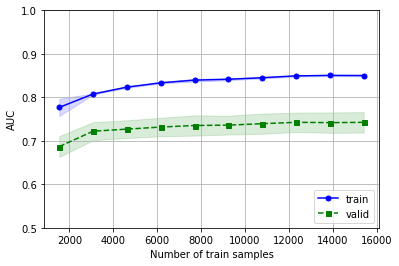

In [76]:
# 利用贝叶斯优化的tpe算法对xgboost调参，迭代次数为50（默认为100）
# 通过学习曲线可以看到模型的训练验证集虽有有0.16间距，有非常明显的过拟合现象
best_para_dict = am.para_optimize(X_train_trans, Y_train, mapper, algo='tpe', iter_num=50, model_list=['xgb'])

>> 开始使用贝叶斯优化的TPE算法对 XGBoost 进行超参数优化
100%|███████████████████████████████████████████████| 50/50 [1:33:45<00:00, 100.09s/it, best loss: -0.7254107288021727]
>> XGBoost 最优超参数交叉验证结果为：训练集平均AUC：0.754  验证集平均AUC：0.7297
>> 模型超参数优化完成,最优模型为 XGBoost


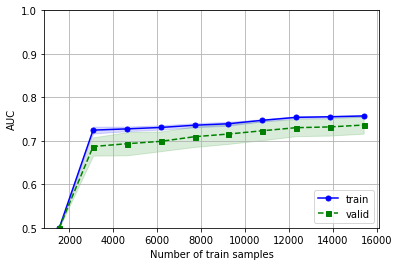

In [77]:
# 利用贝叶斯优化的tpe算法对xgboost调参，并加入惩罚，当训练集和测试集auc差值大于0.02时，以1的权重进行惩罚，迭代次数为50（默认为100）
# 使交叉验证中训练集与测试集的auc拉近，这样训练的模型会比较简单，一般用于减小过拟合现象（训练集验证集差距过大）
# 加入惩罚后在一定程度上减少了训练集和验证集的间距，但有些时候也可能因为惩罚会让模型过于简单，同时也降低了验证集的auc
# 对比上面没有加入惩罚项的情况，可以看到加入惩罚项后，验证集auc只下降了0.01，但明显没有了过拟合现象
# 可以看到由于模型过于简单，在样本量比较少的情况，训练集的auc也是0.5
best_para_dict = am.para_optimize(X_train_trans, Y_train, mapper, algo='tpe', iter_num=50, model_list=['xgb'], 
                                  penalty_space=0.02, penalty_weight=1)

>> 开始使用贝叶斯优化的TPE算法对 LightGBM 进行超参数优化
100%|██████████████████████████████████████████████████| 50/50 [09:04<00:00, 10.94s/it, best loss: -0.7123154888379722]
>> LightGBM 最优超参数交叉验证结果为：训练集平均AUC：0.7612  验证集平均AUC：0.7267
>> 模型超参数优化完成,最优模型为 LightGBM


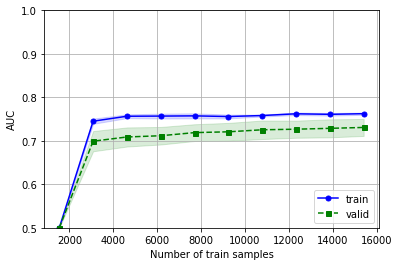

In [78]:
# 利用贝叶斯优化的tpe算法对lightgbm调参，并加入惩罚，迭代次数为50（默认为100）
# 自己设置域空间。具体格式可对方法shift + tab查看源代码的说明，格式必须与说明中的相同，不能缺少参数
lgbm_parameter = lgbm_parameter = {
            'n_estimators': [50, 400, 10],
            'num_leaves': [10, 500, 10],
            'min_child_samples': [10, 300, 2],
            'min_child_weight': [0.0001, 0.01],
            'min_split_gain': [0.0, 1.0],
            'subsample': [0.3, 1.0],
            'colsample_bytree': [0.3, 1.0],
            'reg_lambda': [0.0, 3.0],
            'reg_alpha': [0.0, 3.0],
            'learning_rate': [0.01, 0.3]
        }
best_para_dict = am.para_optimize(X_train_trans, Y_train, mapper, algo='tpe', iter_num=50, model_list=['lgbm'], 
                                  penalty_space=0.02, penalty_weight=1, lgbm_parameter=lgbm_parameter)

>> 开始使用贝叶斯优化的高斯过程算法对 XGBoost 进行超参数优化
   |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■|   [01:29:07,  best loss: 0.7217294889538457]
>> XGBoost 最优超参数交叉验证结果为：训练集平均AUC：0.7474  验证集平均AUC：0.7246
>> 开始使用贝叶斯优化的高斯过程算法对 LightGBM 进行超参数优化
   |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■|   [00:22:27,  best loss: 0.7210304263305279]
>> LightGBM 最优超参数交叉验证结果为：训练集平均AUC：0.747  验证集平均AUC：0.724
>> 开始使用贝叶斯优化的高斯过程算法对 GBDT 进行超参数优化
   |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■|   [01:11:26,  best loss: 0.7173609635855375]
>> GBDT 最优超参数交叉验证结果为：训练集平均AUC：0.7517  验证集平均AUC：0.7245
>> 模型超参数优化完成,最优模型为 XGBoost


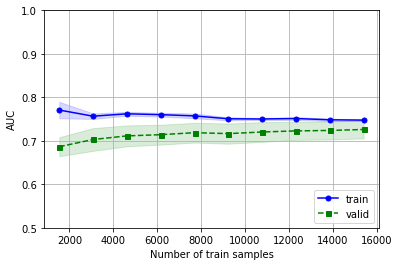

In [79]:
# 利用贝叶斯优化的gp算法对三个模型调参，并加入惩罚，迭代次数为50（默认为100）
best_para_dict = am.para_optimize(X_train_trans, Y_train, mapper, algo='gp', iter_num=50, model_list=['xgb', 'lgbm', 'gbdt'], 
                                  penalty_space=0.02, penalty_weight=1)

>> 开始使用随机搜索对 XGBoost 进行超参数优化
100%|████████████████████████████████████████████████| 50/50 [1:43:58<00:00, 81.14s/it, best loss: -0.7187156631365615]
>> XGBoost 最优超参数交叉验证结果为：训练集平均AUC：0.7668  验证集平均AUC：0.7328
>> 开始使用随机搜索对 LightGBM 进行超参数优化
100%|██████████████████████████████████████████████████| 50/50 [12:50<00:00, 14.41s/it, best loss: -0.6989685921222848]
>> LightGBM 最优超参数交叉验证结果为：训练集平均AUC：0.7845  验证集平均AUC：0.7317
>> 模型超参数优化完成,最优模型为 XGBoost


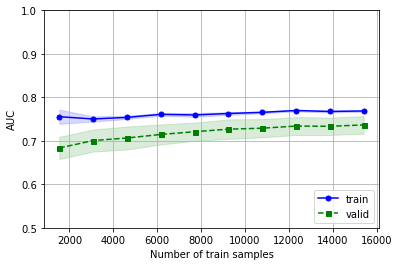

In [80]:
# 利用随机搜索算法对两个模型调参，并加入惩罚，迭代次数为50（默认为100）
best_para_dict = am.para_optimize(X_train_trans, Y_train, mapper, algo='rand', iter_num=50, model_list=['xgb', 'lgbm'], 
                                  penalty_space=0.02, penalty_weight=1)

>> 开始使用贝叶斯优化的TPE算法对 XGBoost 进行超参数优化
100%|█████████████████████████████████████████████| 100/100 [3:00:03<00:00, 179.93s/it, best loss: -0.7267741177738487]
>> XGBoost 最优超参数交叉验证结果为：训练集平均AUC：0.7652  验证集平均AUC：0.736
>> 开始使用贝叶斯优化的TPE算法对 LightGBM 进行超参数优化
100%|█████████████████████████████████████████████████| 100/100 [20:05<00:00,  9.23s/it, best loss: -0.712472397641699]
>> LightGBM 最优超参数交叉验证结果为：训练集平均AUC：0.7649  验证集平均AUC：0.7287
>> 开始使用贝叶斯优化的TPE算法对 GBDT 进行超参数优化
100%|██████████████████████████████████████████████| 100/100 [2:26:50<00:00, 130.48s/it, best loss: -0.709435412006163]
>> GBDT 最优超参数交叉验证结果为：训练集平均AUC：0.7554  验证集平均AUC：0.7224
>> 开始使用贝叶斯优化的TPE算法对 随机森林 进行超参数优化
100%|████████████████████████████████████████████████| 100/100 [45:53<00:00, 36.03s/it, best loss: -0.7099188933653386]
>> 随机森林 最优超参数交叉验证结果为：训练集平均AUC：0.7356  验证集平均AUC：0.7128
>> 模型超参数优化完成,最优模型为 XGBoost


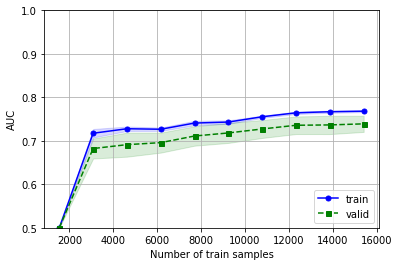

In [81]:
# 利用贝叶斯优化的tpe算法对四个模型调参，并加入惩罚，迭代次数为默认的100
best_para_dict = am.para_optimize(X_train_trans, Y_train, mapper, algo='tpe', model_list=['xgb', 'lgbm', 'gbdt', 'rf'],
                                  penalty_space=0.02, penalty_weight=1)

In [82]:
# 按照parameter_optimization返回的结果,建立lightgbm模型,且无跨时间测试数据集
model = am.get_bset_para_model(best_para_dict, 'lgbm', mapper, [[X_train_trans,Y_train],[X_test_trans,Y_test],[None,None]])

>> LightGBM 模型效果如下:
>> 训练KS值: 0.4024  AUC值: 0.7693
>> 测试KS值: 0.3792  AUC值: 0.7348


In [83]:
# 按照parameter_optimization返回的结果,建立最优模型
model = am.get_bset_para_model(best_para_dict, 'best', mapper,
                               [[X_train_trans,Y_train],[X_test_trans,Y_test],[X_time_test_trans,Y_time_test]])

>> XGBoost 模型效果如下:
>> 训练KS值: 0.4112  AUC值: 0.7734
>> 测试KS值: 0.3772  AUC值: 0.7396
>> 跨时间测试KS值: 0.3492  AUC值: 0.7334


## 生成结果报表

In [84]:
# 转换陪跑数据集
pp_data_trans = am.get_pp_data_trans(pp_data, keep_cols, date_span=6)

datalist = [[X_train_trans,Y_train],[X_test_trans,Y_test],[X_time_test_trans,Y_time_test],[pp_data_trans]]

In [85]:
# 需要分组时,生成最优分组方案
group_final = am.get_group_final(datalist, model=model, mapper=mapper, group_nums=5, group_norm='pp')
group_final

>> 开始尝试分组方案 [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]
>> 共尝试了81种分组方案,最优分组方案为 [12, 33, 67, 88]
>> 该分组方案各组数目占比累加值为 [0.12, 0.33, 0.67, 0.88]


[12, 33, 67, 88]

In [86]:
# get_group_final方法选出的最优分组方案的各组情况
result_rank, pp_rank = am.get_result_table(datalist, model=model, mapper=mapper, group_method=group_final, group_norm='pp')
result_rank

,训练集总数,训练集目标数,训练集分组占比,训练集目标占比,测试集总数,测试集目标数,测试集分组占比,测试集目标占比,跨时间测试集总数,跨时间测试集目标数,跨时间测试集分组占比,跨时间测试集目标占比,陪跑总数,陪跑分组占比,预测结果阈值
rank,,,,,,,,,,,,,,,
1.0,2133,570,0.1246,0.2672,910,191,0.1240,0.2099,4645,1092,0.1254,0.2351,5020,0.12,1.0000
2.0,3597,407,0.2101,0.1131,1595,200,0.2173,0.1254,7775,878,0.2099,0.1129,8785,0.21,0.1550
3.0,5756,291,0.3362,0.0506,2415,119,0.3291,0.0493,12714,739,0.3432,0.0581,14224,0.34,0.0801
4.0,3626,94,0.2118,0.0259,1557,52,0.2122,0.0334,7711,226,0.2082,0.0293,8785,0.21,0.0396
5.0,2010,16,0.1174,0.0080,862,14,0.1175,0.0162,4196,89,0.1133,0.0212,5020,0.12,0.0253


In [87]:
# 查看十等分情况
result_rank, pp_rank = am.get_result_table(datalist, model=model, mapper=mapper, group_method=10)
result_rank

,训练集总数,训练集目标数,训练集目标占比,测试集总数,测试集目标数,测试集目标占比,跨时间测试集总数,跨时间测试集目标数,跨时间测试集目标占比
rank,,,,,,,,,
1.0,1713,495,0.2890,734,160,0.2180,3705,916,0.2472
2.0,1712,266,0.1554,734,120,0.1635,3704,553,0.1493
3.0,1712,173,0.1011,734,80,0.1090,3704,403,0.1088
4.0,1712,112,0.0654,734,69,0.0940,3704,292,0.0788
5.0,1712,100,0.0584,734,44,0.0599,3704,248,0.0670
6.0,1712,75,0.0438,733,26,0.0355,3704,172,0.0464
7.0,1712,67,0.0391,734,20,0.0272,3704,149,0.0402
8.0,1712,50,0.0292,734,31,0.0422,3704,117,0.0316
9.0,1712,27,0.0158,734,12,0.0163,3704,99,0.0267


In [88]:
# 生成最优分组方案的报表，因datalist中陪跑数据集非None，并且以陪跑为分组标准，报表会展示陪跑分布
am.result_report(datalist, model=model, mapper=mapper, group_method=group_final, group_norm='pp', 
                 report_file=r'./usage/result/result_report_defined_group.html')

>> 模型训练样本情况绘制完成
>> 模型分组排序情况绘制完成
>> 跨时间分组分布绘制完成
>> 模型解释绘制完成
>> 可视化报表已输出


In [89]:
# 生成十等分方案的报表
am.result_report(datalist, model=model, mapper=mapper, group_method=10, report_file=r'./usage/result/result_report_defined_10.html')

>> 模型训练样本情况绘制完成
>> 模型分组排序情况绘制完成
>> 模型解释绘制完成
>> 可视化报表已输出


In [90]:
# 输出pkl、pmml文件
am.get_model_file(model, mapper, X_train_trans, Y_train, pkl_file=r'./usage/result/model_defined.pkl', 
                  pmml_file=r'./usage/result/model_defined.pmml')

>> 模型建立完成,模型文件已输出


In [91]:
# 获得分组阈值
group_score = am.get_group_score(datalist, model_pkl=r'./usage/result/model_defined.pkl', group_final=group_final, group_norm='pp')

# 修改pmml文件，增加group输出
am.modifying_pmml(pmml_file_in=r'./usage/result/model_defined.pmml',
                  pmml_file_out=r'./usage/result/model_defined_modifying.pmml',
                  group_score=group_score)

>> PMML文件修改完成,按照各组阈值增加新输出Group


In [92]:
# 使用带有分组的pmml文件预测
am.get_model_predict(r'./usage/result/model_complete_fullmodify1.pmml', X_test_trans).head()

已计算完成1000个样本
已计算完成2000个样本
已计算完成3000个样本
已计算完成4000个样本
已计算完成5000个样本
已计算完成6000个样本
已计算完成7000个样本
全部样本计算完成


,predict,group
369,0.136163,D
27923,0.064907,C
60726,0.032103,A
45143,0.059516,B
8653,0.217302,D
